In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [17]:
#Загрузка общего датасета
dataset=pd.read_excel('General_sel.xlsx')
dataset.head(10)


,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"модуль упругости, ГПа","Прочность при растяжении, МПа","Модуль упругости при растяжении, ГПа"
0,0,1.857143,2030.0,30.00,22.267857,100.000000,210.0,220.0,0,4.0,57.0,738.736842,3000.0,70.0
1,1,1.857143,2030.0,50.00,23.750000,284.615385,210.0,220.0,0,4.0,60.0,738.736842,3000.0,70.0
2,2,1.857143,2030.0,49.90,33.000000,284.615385,210.0,220.0,0,4.0,70.0,738.736842,3000.0,70.0
3,3,1.857143,2030.0,129.00,21.250000,300.000000,210.0,220.0,0,5.0,47.0,738.736842,3000.0,70.0
4,4,2.771331,2030.0,111.86,22.267857,284.615385,210.0,220.0,0,5.0,57.0,753.000000,3000.0,70.0
5,5,2.767918,2000.0,111.86,22.267857,284.615385,210.0,220.0,0,5.0,60.0,748.000000,3000.0,70.0
6,6,2.569620,1910.0,111.86,22.267857,284.615385,210.0,220.0,0,5.0,70.0,807.000000,3000.0,70.0
7,7,2.561475,1900.0,111.86,22.267857,284.615385,380.0,120.0,0,7.0,47.0,535.000000,1800.0,75.0
8,8,3.557018,1930.0,129.00,21.250000,300.000000,380.0,120.0,0,7.0,57.0,889.000000,1800.0,75.0
9,9,3.532338,2100.0,129.00,21.250000,300.000000,1010.0,300.0,0,7.0,60.0,1421.000000,2000.0,78.0


In [18]:
dataset.shape

(999, 14)

In [19]:
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset.head(10).T

,0,1,2,3,4,5,6,7,8,9
Соотношение матрица-наполнитель,1.857143,1.857143,1.857143,1.857143,2.771331,2.767918,2.569620,2.561475,3.557018,3.532338
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2000.000000,1910.000000,1900.000000,1930.000000,2100.000000
"Количество отвердителя, м.%",30.000000,50.000000,49.900000,129.000000,111.860000,111.860000,111.860000,111.860000,129.000000,129.000000
"Содержание эпоксидных групп,%_2",22.267857,23.750000,33.000000,21.250000,22.267857,22.267857,22.267857,22.267857,21.250000,21.250000
"Температура вспышки, С_2",100.000000,284.615385,284.615385,300.000000,284.615385,284.615385,284.615385,284.615385,300.000000,300.000000
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,380.000000,380.000000,1010.000000
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,120.000000,120.000000,300.000000
"Угол нашивки, град",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Шаг нашивки,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000
Плотность нашивки,57.000000,60.000000,70.000000,47.000000,57.000000,60.000000,70.000000,47.000000,57.000000,60.000000


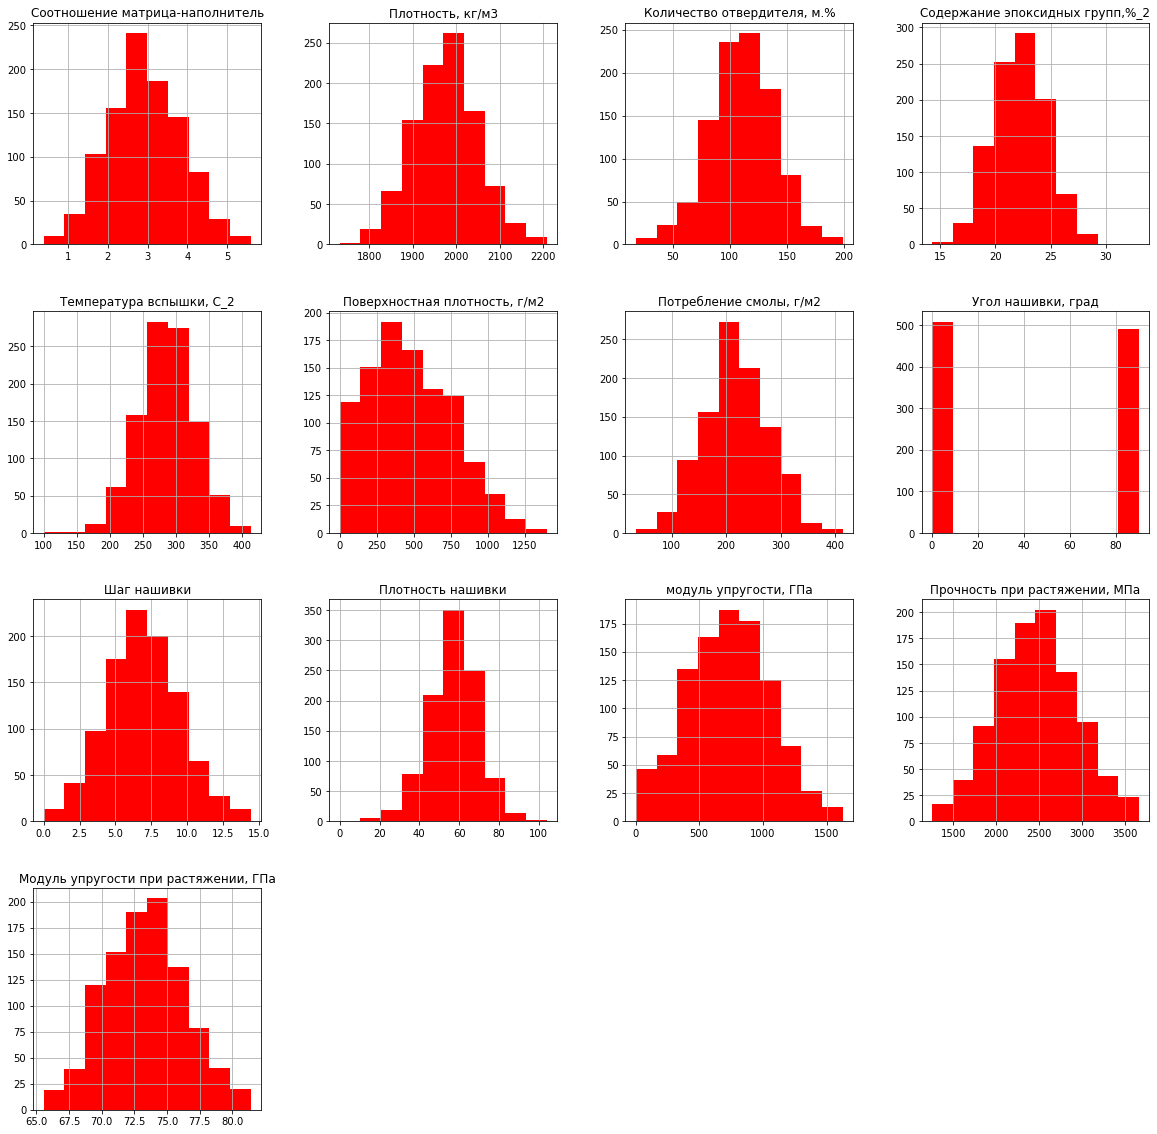

In [20]:
#Гистограммы распределения каждой из переменных после удаления выбросов
dataset.hist(figsize = (20,20), color = "r")
plt.show()


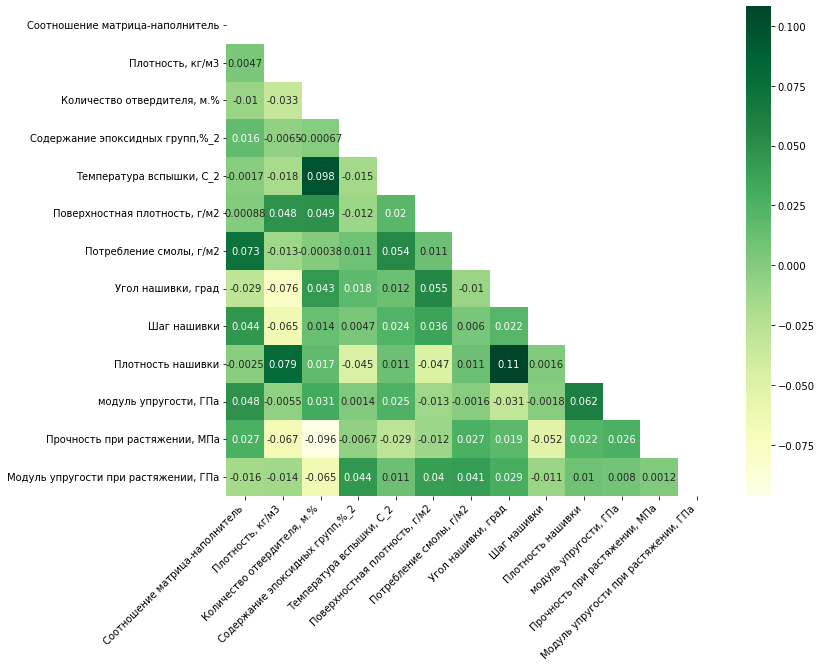

In [21]:
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(dataset.corr(), mask = np.triu(dataset.corr()), 
            annot = True, square = True, cmap = 'YlGn')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [22]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,999.0,2.931963,0.913808,0.389403,2.321061,2.908787,3.552660,5.591742
"Плотность, кг/м3",999.0,1975.822482,74.004337,1731.764635,1923.962402,1977.661795,2021.460704,2207.773481
"Количество отвердителя, м.%",999.0,110.775376,28.275817,17.740275,92.475643,110.689775,129.884490,198.953207
"Содержание эпоксидных групп,%_2",999.0,22.247427,2.406914,14.254985,20.608034,22.226455,23.961934,33.000000
"Температура вспышки, С_2",999.0,285.894836,40.937098,100.000000,258.910227,285.947768,313.002106,413.273418
"Поверхностная плотность, г/м2",999.0,483.879563,281.892337,0.603740,266.816645,453.919475,695.217842,1399.542362
"Потребление смолы, г/м2",999.0,218.571311,59.476164,33.803026,179.766002,219.179155,257.481724,414.590628
"Угол нашивки, град",999.0,44.234234,45.016020,0.000000,0.000000,0.000000,90.000000,90.000000
Шаг нашивки,999.0,6.929235,2.550888,0.000000,5.115560,6.968286,8.611134,14.440522
Плотность нашивки,999.0,57.196022,12.391105,0.000000,49.860400,57.532956,65.000793,103.988901


In [23]:
#Нормализация данных
minmax_scaler=MinMaxScaler()
dataset_norm=minmax_scaler.fit_transform(np.array(dataset[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки']]))
dataset_norm

array([[0.28213084, 0.62653324, 0.4529507 , ..., 0.        , 0.2769983 ,
        0.54813542],
       [0.28213084, 0.62653324, 0.4529507 , ..., 0.        , 0.2769983 ,
        0.57698465],
       [0.28213084, 0.62653324, 0.4529507 , ..., 0.        , 0.2769983 ,
        0.67314876],
       ...,
       [0.55575038, 0.50547008, 0.25492681, ..., 1.        , 0.28815814,
        0.65035483],
       [0.63739572, 0.70384225, 0.45463545, ..., 1.        , 0.43718647,
        0.56026242],
       [0.65713085, 0.33328967, 0.25522191, ..., 1.        , 0.42096135,
        0.74464166]])

In [24]:
dataset_norm_df=pd.DataFrame(dataset_norm, columns=['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки'])
dataset_norm_df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.452951,0.067654,0.427467,0.000000,0.149682,0.280303,0.725961,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.452951,0.178021,0.506535,0.589311,0.149682,0.280303,0.725961,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.452951,0.177469,1.000000,0.589311,0.149682,0.280303,0.725961,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.452951,0.613972,0.373167,0.638420,0.149682,0.280303,0.725961,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.461725,0.519387,0.427467,0.589311,0.149682,0.280303,0.725961,0.488979,0.0,0.346248,0.548135


In [25]:
#Сохранение датасета с нормализованными данными в excel файл
dataset_norm_df.to_excel('General_norm.xlsx')

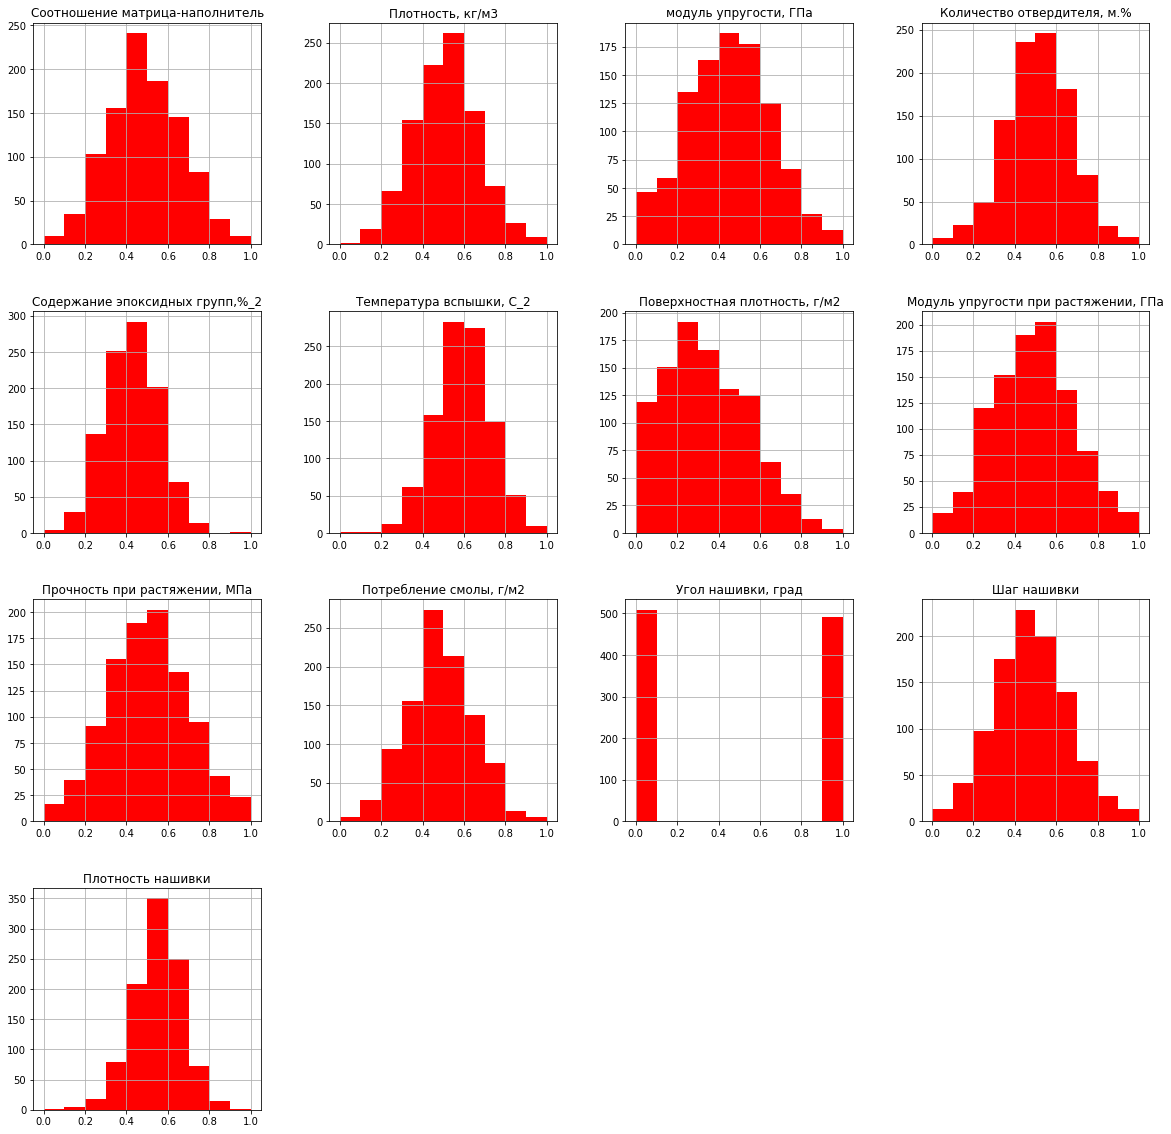

In [26]:
#Графики распределений нормализованных значений
dataset_norm_df.hist(figsize = (20,20), color = "r")
plt.show()

In [27]:
#Стандартизация данных
std_scaler=StandardScaler()
dataset_std=std_scaler.fit_transform(np.array(dataset[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки']]))
dataset_std

array([[-1.17678901,  0.7324524 ,  0.01103607, ..., -0.98312534,
        -1.14889485, -0.01582753],
       [-1.17678901,  0.7324524 ,  0.01103607, ..., -0.98312534,
        -1.14889485,  0.22640289],
       [-1.17678901,  0.7324524 ,  0.01103607, ..., -0.98312534,
        -1.14889485,  1.03383765],
       ...,
       [ 0.38171682, -0.04663706, -0.97761283, ...,  1.0171643 ,
        -1.08568758,  0.84245011],
       [ 0.8467594 ,  1.22996654,  0.01944733, ...,  1.0171643 ,
        -0.24161906,  0.08599596],
       [ 0.95916844, -1.15468628, -0.9761395 , ...,  1.0171643 ,
        -0.33351507,  1.63412244]])

In [28]:
dataset_std_df=pd.DataFrame(dataset_std, columns=['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки'])
dataset_std_df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.176789,0.732452,0.011036,-2.858126,0.008492,-4.543262,-0.972062,-1.084021,1.165238,0.024033,-0.983125,-1.148895,-0.015828
1,-1.176789,0.732452,0.011036,-2.150453,0.624586,-0.031270,-0.972062,-1.084021,1.165238,0.024033,-0.983125,-1.148895,0.226403
2,-1.176789,0.732452,0.011036,-2.153991,4.469606,-0.031270,-0.972062,-1.084021,1.165238,0.024033,-0.983125,-1.148895,1.033838
3,-1.176789,0.732452,0.011036,0.644853,-0.414608,0.344730,-0.972062,-1.084021,1.165238,0.024033,-0.983125,-0.756678,-0.823262
4,-0.175872,0.732452,0.054842,0.038378,0.008492,-0.031270,-0.972062,-1.084021,1.165238,0.024033,-0.983125,-0.756678,-0.015828


In [29]:
#Сохранение датасета со стандартизированными данными в excel файл
dataset_std_df.to_excel('General_std.xlsx')

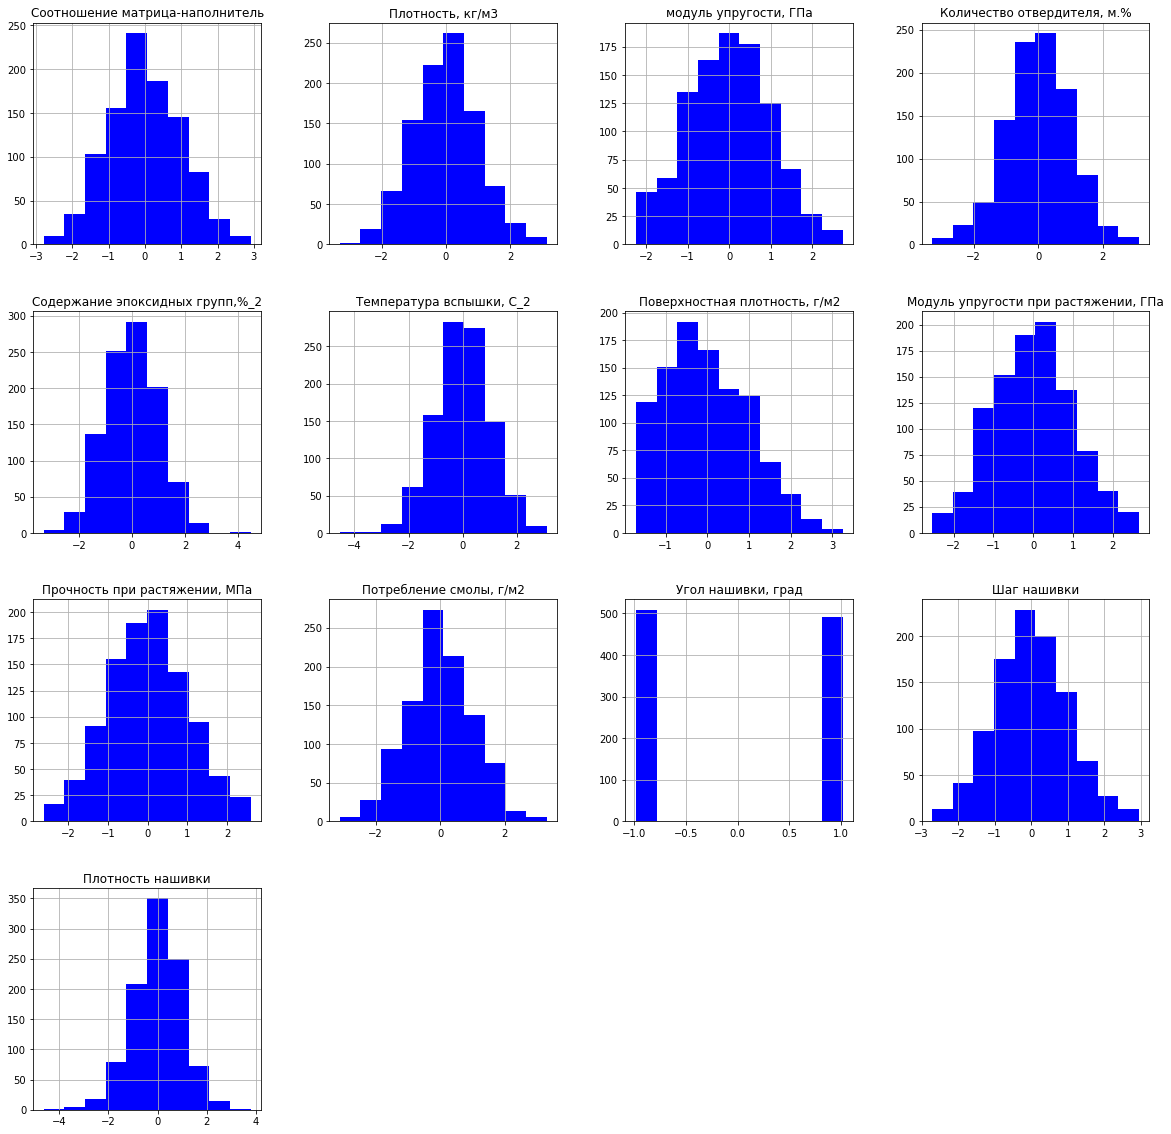

In [30]:
#Графики распределений стандартизированных значений
dataset_std_df.hist(figsize = (20,20), color = "b")
plt.show()